In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import time
import datetime
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False

# 1. Import Data

In [2]:
data = pd.read_csv(r'./Data/tap4fun_data/tap_fun_train.csv')

In [3]:
data.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


# 2. Data Cleaning

In [4]:
RegisterDate = data.loc[:,"register_time"].apply(lambda x: x[:10])

In [5]:
# Aggregated average calculation of "pay_pric"e according to players' registration date
RegisterDateMean = data["pay_price"].groupby(RegisterDate).mean()

In [6]:
RegisterDateMean

register_time
2018-01-26    0.828631
2018-01-27    0.411715
2018-01-28    0.424587
2018-01-29    0.565344
2018-01-30    0.776891
2018-01-31    0.353800
2018-02-01    0.304698
2018-02-02    0.846928
2018-02-03    0.741158
2018-02-04    0.440295
2018-02-05    0.684033
2018-02-06    0.413324
2018-02-07    0.454560
2018-02-08    0.478379
2018-02-09    0.653726
2018-02-10    0.682243
2018-02-11    0.405305
2018-02-12    0.820042
2018-02-13    0.459915
2018-02-14    0.484836
2018-02-15    0.252700
2018-02-16    0.811025
2018-02-17    0.399717
2018-02-18    0.396659
2018-02-19    0.370515
2018-02-20    0.271209
2018-02-21    0.435525
2018-02-22    0.477723
2018-02-23    1.041871
2018-02-24    0.702184
2018-02-25    0.515020
2018-02-26    0.956741
2018-02-27    0.413218
2018-02-28    0.527081
2018-03-01    0.503308
2018-03-02    0.702079
2018-03-03    0.389855
2018-03-04    0.381600
2018-03-05    0.695222
2018-03-06    0.807820
Name: pay_price, dtype: float64

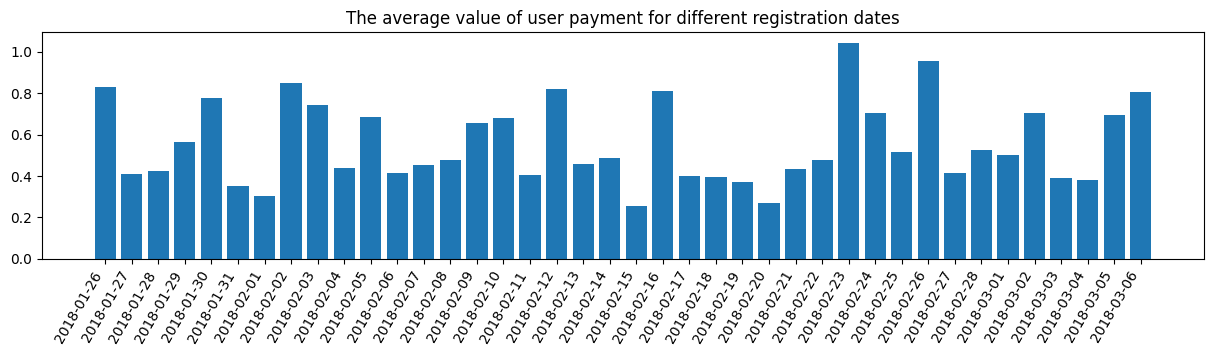

In [7]:
plt.figure(figsize=(15,3),dpi=100)
plt.title("The average value of user payment for different registration dates")
plt.bar(RegisterDateMean.index, RegisterDateMean.values)
plt.xticks(RegisterDateMean.index,rotation=60,ha="right");

From the picture, it is almost impossible to see that the date is related to the payment amount. It seems that the overall is relatively random and messy, but there will be a peak every few days. We can try to convert the date into seven days of the week, and see if there is an obvious relationship between the week and the amount payment.

In [8]:
RegisterWeekday = data.loc[:,"register_time"].apply(lambda x: datetime.datetime.strptime(x[:10],"%Y-%m-%d").weekday()+1) #1~7分别代表周一到周日

In [9]:
RegisterWeekday

0          5
1          5
2          5
3          5
4          5
          ..
2288002    6
2288003    6
2288004    6
2288005    6
2288006    6
Name: register_time, Length: 2288007, dtype: int64

In [10]:
RegisterWeekDayMean = data["pay_price"].groupby(RegisterWeekday).mean()

In [11]:
RegisterWeekDayMean

register_time
1    0.618232
2    0.484993
3    0.447997
4    0.378135
5    0.814581
6    0.548842
7    0.426176
Name: pay_price, dtype: float64

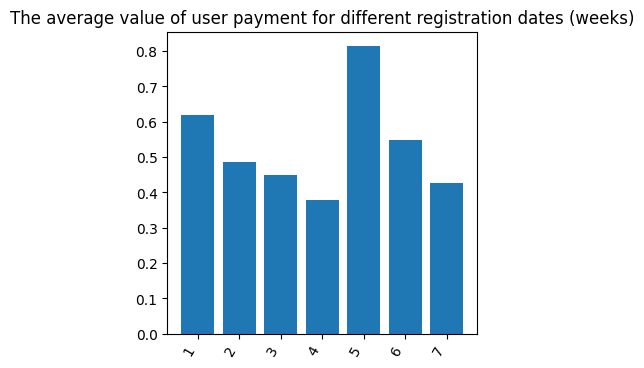

In [12]:
plt.figure(figsize=(4,4),dpi=100)
plt.title("The average value of user payment for different registration dates (weeks)")
plt.bar(RegisterWeekDayMean.index, RegisterWeekDayMean.values)
plt.xticks(RegisterWeekDayMean.index,rotation=60,ha="right");

The payout amount is obviously bigger for those who register on Friday and Monday, and it will gradually decline following the peak. The payment amount appears to be correlated with the week in this trend, but in reality, it is more likely to be correlated with the game's purchase volume, the release cycle, and the channel. Maybe every Friday and every Monday can be ranked in the channel with the highest concentration of quality users, or Friday will draw in a lot of players who are getting ready for the weekend, and Monday will draw in a lot of players who don't want to go to work yet. The traffic coming on Friday and Monday may consist of people who routinely work and earn money, based on the peaks on these two days. Whatever the case, we can determine the correlation coefficient between the week and the amount paid on the 45th day from a feature perspective:

In [13]:
pd.concat([data["prediction_pay_price"],RegisterWeekday],axis=1).corr()

,prediction_pay_price,register_time
prediction_pay_price,1.00000,0.00017
register_time,0.00017,1.00000


The correlation coefficient is very very small, and the two are almost irrelevant, so we don't need to put the week into the feature matrix.

In [14]:
RegisterTime = data.loc[:,"register_time"].apply(lambda x: int(x[11:13]))

In [15]:
RegisterTime

0          19
1           0
2           0
3           0
4           0
           ..
2288002    14
2288003    14
2288004    14
2288005    14
2288006    14
Name: register_time, Length: 2288007, dtype: int64

In [16]:
RegisterTimeMean = data["pay_price"].groupby(RegisterTime).mean()

In [17]:
RegisterTimeMean

register_time
0     0.542833
1     0.432465
2     0.350108
3     0.400207
4     0.390398
5     0.426960
6     0.427454
7     0.363325
8     0.370818
9     0.334605
10    1.268075
11    1.027658
12    0.726206
13    0.520226
14    0.570217
15    0.640136
16    0.725031
17    0.449590
18    0.464896
19    0.382819
20    0.388107
21    0.432118
22    0.598543
23    0.570575
Name: pay_price, dtype: float64

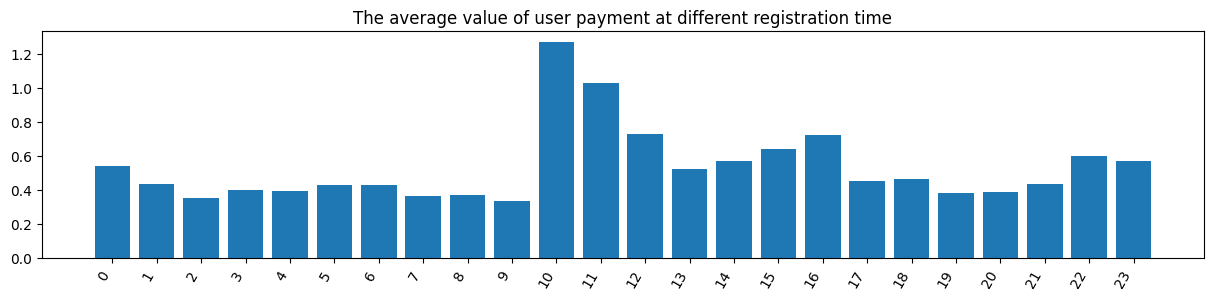

In [18]:
plt.figure(figsize=(15,3),dpi=100)
plt.title("The average value of user payment at different registration time")
plt.bar(RegisterTimeMean.index, RegisterTimeMean.values)
plt.xticks(RegisterTimeMean.index,rotation=60,ha="right");

The ability to pay is higher for users who register between 10 am and 12 am and between 4 pm and 5 pm than for users who register at other times. This can be connected to the promotion medium, or it might actually be the timing of registration in relation to the price paid. By chance, the best time to unwind throughout the workday is between 10:00 and 4:00. You can decide the features of pertinent users to ascertain whether it is actually time and payment if you can ascertain which channels are now being advertised. 

In [19]:
pd.concat([data["prediction_pay_price"],RegisterTime],axis=1).corr()

,prediction_pay_price,register_time
prediction_pay_price,1.000000,0.000708
register_time,0.000708,1.000000


Registration time seems to have a weak association with payment amount, therefore we can use it for modeling.

In [20]:
data.insert(data.shape[1]-1,"register_clock",RegisterTime) 

In [21]:
data.drop(columns=["register_time","user_id"],inplace=True) 

# 3. Selection of Model

In [22]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as TTS 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.preprocessing import MinMaxScaler

In [54]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [55]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=1412)

In [56]:
Xtrain

,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,magic_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,register_clock
243592,10000.0,600.0,0.0,0.0,0.0,0.0,10000.0,400.0,0.0,0.0,...,0,0,0,0,0,0,0.166667,0.00,0,19
361662,39038.0,8750.0,0.0,0.0,3000.0,0.0,42434.0,6060.0,0.0,0.0,...,1,0,0,1,1,1,0.833333,0.00,0,12
1319519,10000.0,1600.0,0.0,0.0,0.0,0.0,10000.0,900.0,0.0,0.0,...,0,0,0,0,0,0,0.166667,0.00,0,15
276423,26625.0,6900.0,0.0,0.0,0.0,0.0,31625.0,3900.0,0.0,0.0,...,1,1,0,0,0,0,4.500000,0.00,0,9
1060863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.666667,0.00,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811115,536163.0,293306.0,200000.0,0.0,200000.0,0.0,924347.0,142940.0,68527.0,0.0,...,0,0,0,0,0,0,3.833333,0.00,0,10
1020414,66454812.0,64088438.0,54320006.0,53147620.0,24646328.0,26678007.0,57994939.0,62842090.0,7988873.0,8225235.0,...,81,72,72,117,110,116,306.833333,196.84,16,1
1343864,613569.0,407274.0,200000.0,0.0,203000.0,0.0,1556143.0,799600.0,60000.0,0.0,...,0,0,0,2,2,2,5.333333,0.00,0,10
982704,167780.0,98106.0,0.0,0.0,1000.0,0.0,181713.0,82245.0,1200.0,0.0,...,0,0,0,1,1,1,6.166667,0.00,0,4


In [57]:
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [58]:
reg = LR() 

In [59]:
reg_benchmark = reg.fit(Xtrain,Ytrain)

In [60]:
reg_benchmark.score(Xtrain,Ytrain)

0.5604160157526339

In [61]:
reg_benchmark.score(Xtest,Ytest) 

0.5581998030191249

The training set and test set scores are low and similar, indicating underfitting. 
Simple linear model has several learning limitations.

In [62]:
y_pred = reg_benchmark.predict(Xtest) 

In [63]:
np.sqrt(MSE(Ytest,y_pred))

62.001161836601966

In [64]:
reg_tree = RFR(n_estimators=10,max_features=5) #100+，max_features=5

In [65]:
reg_tree.fit(Xtrain,Ytrain)

RandomForestRegressor(max_features=5, n_estimators=10)

In [66]:
reg_tree.score(Xtrain,Ytrain)

0.8791916938841412

In [67]:
reg_tree.score(Xtest,Ytest)

0.4787697896126887

Random forests are overfitting. Try to tune random forests against overfitting and try using tree models.

In [68]:
y_pred = reg_tree.predict(Xtest)

In [69]:
np.sqrt(MSE(Ytest,y_pred))

67.34442743862002

This is not a promising omen. In general, if a piece of data does better on the linear model and worse on the tree model, it means that the data follows the linear law and works better with models like linear regression and Bayesian. On the other hand, it means that the data are more like the nonlinear law, which is better for nonlinear models like tree models. But if the results from the tree model and the linear model are the same and neither is high, it means that the data itself is harder to learn. We can change some things about the random forest and see that the RMSE is still very high no matter what we do.

In [70]:
reg_tree2 = RFR(n_estimators=20,max_features=5).fit(Xtrain,Ytrain) # increase trees
np.sqrt(MSE(Ytest,reg_tree2.predict(Xtest)))

68.75217043423905

In [71]:
reg_tree3 = RFR(n_estimators=20,max_depth=2,max_features=5).fit(Xtrain,Ytrain) # control the max depth
np.sqrt(MSE(Ytest,reg_tree3.predict(Xtest)))

71.6489982081048

If linear regression is found to be the best model when the benchmark is set, there isn't much room to change anything because linear regression has almost no parameters that can be changed. When faced with this kind of data, it is either to spend a lot of time building features or to use neural networks. But in any case, it is first to do everything to get the RMSE of the dataset as low as possible.

# 4. Data Engineering

## 4.1 Create Features Based On Data Analysis

In [72]:
GrowthFeature = [] # Growth 
for i in X.columns:
    if "add" in i:
        GrowthFeature.append(i)
#     elif "reduce" in i:
#         GrowthFeature.append(i)

In [73]:
LevelUpFeature = [] # Level 
for i in X.columns:
    if "bd_" in i:
        LevelUpFeature.append(i)
    elif "sr_" in i:
        LevelUpFeature.append(i)

In [74]:
GrowthFeature

['wood_add_value',
 'stone_add_value',
 'ivory_add_value',
 'meat_add_value',
 'magic_add_value',
 'infantry_add_value',
 'cavalry_add_value',
 'shaman_add_value',
 'wound_infantry_add_value',
 'wound_cavalry_add_value',
 'wound_shaman_add_value',
 'general_acceleration_add_value',
 'building_acceleration_add_value',
 'reaserch_acceleration_add_value',
 'training_acceleration_add_value',
 'treatment_acceleraion_add_value']

In [75]:
LevelUpFeature

['bd_training_hut_level',
 'bd_healing_lodge_level',
 'bd_stronghold_level',
 'bd_outpost_portal_level',
 'bd_barrack_level',
 'bd_healing_spring_level',
 'bd_dolmen_level',
 'bd_guest_cavern_level',
 'bd_warehouse_level',
 'bd_watchtower_level',
 'bd_magic_coin_tree_level',
 'bd_hall_of_war_level',
 'bd_market_level',
 'bd_hero_gacha_level',
 'bd_hero_strengthen_level',
 'bd_hero_pve_level',
 'sr_scout_level',
 'sr_training_speed_level',
 'sr_infantry_tier_2_level',
 'sr_cavalry_tier_2_level',
 'sr_shaman_tier_2_level',
 'sr_infantry_atk_level',
 'sr_cavalry_atk_level',
 'sr_shaman_atk_level',
 'sr_infantry_tier_3_level',
 'sr_cavalry_tier_3_level',
 'sr_shaman_tier_3_level',
 'sr_troop_defense_level',
 'sr_infantry_def_level',
 'sr_cavalry_def_level',
 'sr_shaman_def_level',
 'sr_infantry_hp_level',
 'sr_cavalry_hp_level',
 'sr_shaman_hp_level',
 'sr_infantry_tier_4_level',
 'sr_cavalry_tier_4_level',
 'sr_shaman_tier_4_level',
 'sr_troop_attack_level',
 'sr_construction_speed_level'

In [76]:
X["pvp_win_rate"] = X["pvp_win_count"]/X["pvp_battle_count"]
X["pvp_launch_rate"] = X["pvp_lanch_count"]/X["pvp_battle_count"]
X["growth_efficiency"] = X.loc[:,GrowthFeature].mean(axis=1)/X["avg_online_minutes"]
X["pay_growth_efficiency"] = X.loc[:,GrowthFeature].mean(axis=1)/X["pay_price"]
X["level_efficiency"] = X.loc[:,LevelUpFeature].mean(axis=1)/X["avg_online_minutes"]
X["pay_level_efficiency"] = X.loc[:,LevelUpFeature].mean(axis=1)/X["pay_price"]

In [77]:
# handling of division by 0 errors ; handling of extreme value errors
for newfeature in ["pvp_win_rate","pvp_launch_rate","growth_efficiency","level_efficiency","pay_growth_efficiency","pay_level_efficiency"]:
    X.loc[X[newfeature].isnull(),newfeature] = 0
    X.loc[X[newfeature] == float("inf"), newfeature] = 0

In [78]:
# high-value
X["high_pay"] = (X["pay_price"] >= 5.98).astype(int)
X["high_play"] = (X["PVP_launch_rate"] >= 0.5).astype(int)

# low-value
X["long_hour"] = (X["avg_online_minutes"] > 800).apply(lambda x: not x).astype(int)
X["low_pvp"] = ((X["PVP_launch_rate"] < 0.2) | (X["pvp_battle_count"] == 0)).apply(lambda x: not x).astype(int)
X["low_pvp_win"] = ((X["PVP_win_rate"]< 0.1) & (X["pvp_battle_count"] != 0)).apply(lambda x: not x).astype(int)
X["lose"] = ((X["avg_online_minutes"] <= 15) | (X["wood_add_value"] <= 10000)).apply(lambda x: not x).astype(int)

KeyError: 'PVP_launch_rate'

## 4.2 Create Features Based On Statistics

### 4.2.1 Correlation : Importance

In [ ]:
corr_list = pd.DataFrame()
for idx, column in enumerate(X.columns):
    corr_ = pd.concat([y,X.loc[:,column]],axis=1).corr().iloc[0,1]
    corr_list.loc[idx,"feature"] = column
    corr_list.loc[idx,"correlation"] = corr_

In [ ]:
corr_list.head()

In [ ]:
corr_list.sort_values("correlation",ascending=False).head(10)

The higher participation in the game, the higher the possibility of paying should be

In [ ]:
corr_list[abs(corr_list["correlation"]) < 0.01]

### 4.2.2 Train/Test Split

In [ ]:
trainr2 = []
testr2 = [] 
testRMSE = []
for i in [0.2,0.3,0.4,0.5]:
    Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=i,random_state=0)
    model = LR().fit(Xtrain,Ytrain)
    trainr2.append(model.score(Xtrain,Ytrain))
    testr2.append(model.score(Xtest,Ytest))
    testRMSE.append(np.sqrt(MSE(Ytest,model.predict(Xtest))))

In [ ]:
plt.plot(trainr2,label="trainR2")
plt.plot(testr2,label="testR2")
plt.xticks(ticks=[0,1,2,3],labels=[0.2,0.3,0.4,0.5])
plt.legend();

In [ ]:
plt.plot(testRMSE)
plt.xticks(ticks=[0,1,2,3],labels=[0.2,0.3,0.4,0.5]);

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.4,random_state=0)

In [ ]:
Ytrain = pd.DataFrame(Ytrain)
Ytest = pd.DataFrame(Ytest)

Ytrain.index = Xtrain.index
Ytest.index = Xtest.index

### 4.2.3 Outlier

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
def AbnormalReplace(Xtrain,Xtest):
    
    # Anomaly detection for all features
    # For non-paying users, replace all outliers with 0
    
    Xtrain_ = Xtrain.copy()
    Xtest_ = Xtest.copy()
    for column in Xtrain_.columns:
        
        f_train = Xtrain_.loc[:,column]
        f_test = Xtest_.loc[:,column]

        QL = np.quantile(f_train,0.25)
        QU = np.quantile(f_train,0.75)
        IQR = QU - QL
        medium_ = f_train.median()
        
        errortrain = ((f_train < (QL - 1.5*IQR)).astype(int) + (f_train > (QU + 1.5*IQR)).astype(int)) != 0
        errortest = ((f_test < (QL - 1.5*IQR)).astype(int) + (f_test > (QU + 1.5*IQR)).astype(int)) != 0

        Xtrain_.loc[((Xtrain_[pay_price]==0).values & errortrain.values),column] = 0
        Xtest_.loc[((Xtest_[pay_price]==0).values & errortest.values),column] = 0
        
    return Xtrain_, Xtest_

In [ ]:
Xtrain["wood_add_value"].describe()

In [ ]:
xtrain, xtest = AbnormalReplace(Xtrain,Xtest) 

In [ ]:
xtrain["wood_add_value"].describe()

### 4.2.4 Normalization

In [ ]:
mm = MinMaxScaler(feature_range = [0,1]) 

In [ ]:
mm = mm.fit(xtrain) 

In [ ]:
xtrain = mm.transform(xtrain) 
xtest = mm.transform(xtest)

In [ ]:
xtrain.min(), xtrain.max()

In [ ]:
xtest.min(), xtest.max()

# 5. Model Ensemble

In [ ]:
from sklearn.linear_model import LogisticRegression as LogiR
from sklearn.metrics import roc_auc_score as ROC 
from sklearn.metrics import recall_score as Recall 
from sklearn.metrics import precision_score as Precision
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [ ]:
y2 = (y != 0).astype(int) # All predicted-paying users convert to 1, predicted-non-paying users convert to 0

In [ ]:
Ytrain2 = y2[Xtrain.index]

In [ ]:
Ytest2 = y2[Xtest.index]

In [ ]:
clf = LogiR(random_state=0) 
clf.fit(xtrain,Ytrain2)
clf.score(xtrain,Ytrain2) # Accuracy on train set

In [ ]:
clf.score(xtest,Ytest2) # Accuracy on test set

In [ ]:
y2_proba = clf.predict_proba(xtest)
y2_proba

In [ ]:
ROC(Ytest2,y2_proba[:,1])

In [ ]:
Recall(Ytest2,clf.predict(xtest))

In [ ]:
Precision(Ytest2,clf.predict(xtest))

In [ ]:
(y2_proba[:,1] > 0.5).sum()

In [ ]:
(Ytest != 0).sum() 

Condition A : That is, many paying users are labeled "non-paying" by logistic regression. If the results are modeled as they are, the main source of RMSE is the amount paid by paying users who aren't included in logistic regression plus the difference between the amount paid by logistic regression and the amount predicted by linear regression .  

Condition B : If we want the logistic regression to catch all real paying users, even if we miss some non-paying users, we have to try to improve Recall. The main source of RMSE is the predicted value of non-paying users mistakenly identified as paying users by the logistic regression in the linear regression plus the difference in the predicted amount of all real paying users by the linear regression. In this case, there are more values that can be predicted by linear regression. 

The problem is that we don't know which of these two conditions will have a lower RMSE overall. However, we do know that Condition A is the status quo, and if we need to improve Recall, we can lower the threshold used for classification in logistic regression. 

When predicting the probability in logistic regression, the threshold is usually set at 0.5. The sample is labeled 1 if the probability is greater than 0.5 and 0 if it is less than 0.5. You can lower the model's threshold if you want to improve Recall. But sklearn's logistic regression doesn't have this function, so we have to figure out the Recall after changing the threshold and do it ourselves.

In [ ]:
prob = y2_proba[:,1]

In [ ]:
# Loop through 20 threshold alternatives from 0 to 0.5 and it's found that the lower the threshold, the higher the recall
for tol in np.linspace(0,0.5,20):
    pred = (prob >= tol).astype(int)
    recall = Recall(Ytest2,pred)
    print("{:.3f} Recall:{:.3f}".format(tol,recall))

In [ ]:
# Loop through 20 threshold alternatives from 0 to 0.026 and it's found that the lower the threshold, the higher the recall
for tol in np.linspace(0,0.026,20):
    pred = (prob >= tol).astype(int)
    recall = Recall(Ytest2,pred)
    print("{:.3f} Recall:{:.3f}".format(tol,recall))

In [ ]:
tol_ = 0.02 # After examination, it is found that 0.02 might be a better value for the threshold.

In [ ]:
(y2_proba[:,1] >= tol_).sum()

In [ ]:
#(clf.predict_proba(xtrain)[:,1] >= tol_).sum()

In [ ]:
result = pd.DataFrame(y2_proba[:,1],index=Xtest.index)
result.columns = ["logi_proba"]
result["logi_y_pred"] = (result["logi_proba"] >= tol_).astype(int)

In [ ]:
logi_train_result = pd.DataFrame(clf.predict_proba(xtrain)[:,1],index=Xtrain.index)
logi_train_result.columns = ["logi_train_proba"]
logi_train_result["logi_y_pred_train"] = (logi_train_result["logi_train_proba"] >= tol_).astype(int)

In [ ]:
# train set
xtrain_linear_reg = xtrain[logi_train_result["logi_y_pred_train"] == 1]
ytrain_linear_reg = Ytrain[logi_train_result["logi_y_pred_train"] == 1]

In [ ]:
# test set
xtest_linear_reg = xtest[result["logi_y_pred"] == 1]
ytest_linear_reg = Ytest[result["logi_y_pred"] == 1]

In [ ]:
def reg_predict(model):
    reg = model.fit(xtrain_linear_reg, ytrain_linear_reg) 
    y_linear_pred = reg.predict(xtest_linear_reg) 
    print("train set R2:{:.3f}".format(reg.score(xtrain_linear_reg, ytrain_linear_reg)))
    print("test set R2:{:.3f}".format(reg.score(xtest_linear_reg, ytest_linear_reg)))
    print("test set RMSE:{:.3f}".format(np.sqrt(MSE(ytest_linear_reg,y_linear_pred))))
    return y_linear_pred

In [ ]:
reg0 = LR()
y_linear_pred0 = reg_predict(reg0)

In [ ]:
reg1 = RFR(n_estimators=100,max_depth=2,max_features=20,random_state=1412)
reg2 = GBR(n_estimators=100,max_depth=2,max_features=20,random_state=1412)

In [ ]:
y_linear_pred1 = reg_predict(reg1)

In [ ]:
y_linear_pred2 = reg_predict(reg2)

# 6. Model Tuning

In [ ]:
reg2 = GBR(n_estimators = 490 # increase the number of trees in the model to improve the overall fit
           ,max_depth= 2 # control the depth of trees to reduce overfit
           ,learning_rate= 0.05 # learning rate has a significant impact on the results of the tree model
           ,max_features = 50 # control the speed of modelling and control overfitting to find the right phase and position using the learning curve
           ,min_samples_split = 25 # increase min_samples_split to increase the number of samples allowed to be leafed out and to reduce the degree of tree fitting
           ,random_state= 1412)

In [ ]:
y_linear_pred2 = reg_predict(reg2)

In [ ]:
result["reg_result"] = 0

In [ ]:
result.loc[result["logi_y_pred"] == 1,"reg_result"] = y_linear_pred2

In [ ]:
np.sqrt(MSE(Ytest,result["reg_result"]))

In [ ]:
FeatureImportance = pd.concat([pd.DataFrame(Xtrain.columns),pd.DataFrame(reg2.feature_importances_)],axis=1)

In [ ]:
FeatureImportance.sort_values(0,ascending=False) 